# <font color = green> Data Analysis: Exploring the Global Presence of Starbucks </font>

In [4]:
starbucks = pd.read_csv('starbucks.csv')
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [5]:
countries = starbucks.groupby('Country').size().reset_index(name='Total')
countries.columns = ['country_code', 'total']

In [6]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.0 MB/s eta 0:00:00


In [7]:
import plotly.express as px
import pandas as pd
import pycountry

# Group by country and count the number of stores
countries = starbucks.groupby('Country').size().reset_index(name='total')

# Convert ISO2 to ISO3 (assuming you have a mapping of ISO2 codes to country names)
def convert_iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2).alpha_3
    except AttributeError:
        return None

# Example mapping for demonstration (replace with your actual data)
country_iso_mapping = {
    'US': 'USA', 'CA': 'CAN', 'GB': 'GBR', 'DE': 'DEU', 'FR': 'FRA',
    'AU': 'AUS', 'CN': 'CHN', 'JP': 'JPN', 'KR': 'KOR', 'BR': 'BRA'
}
countries['iso3'] = countries['Country'].map(country_iso_mapping)

# Define Starbucks colors
starbucks_green = '#00704A'  # Dark green
light_green = '#A8DAB5'       # Light green
gold = '#F5E05E'               # Soft gold for contrast
colors = [starbucks_green, light_green, gold]  # Color palette

# Create a color scale
colorscale = [[0, starbucks_green], [0.5, light_green], [1, gold]]

# Plot the choropleth map
fig = px.choropleth(
    countries,
    locations="iso3",
    color="total",
    hover_name="Country",
    color_continuous_scale=colorscale,
    title="Starbucks Stores - Worldwide"
)

fig.update_layout(
    legend_title_text='Number of Stores',
    coloraxis_colorbar=dict(title="Total Stores"),
    margin=dict(l=0, r=0, t=50, b=0),
    template="plotly_white"  # Using a clean template for better aesthetics
)

# Show the figure
fig.show()


In [8]:
import pandas as pd
import plotly.express as px
import pycountry

# Assuming starbucks is a pandas DataFrame containing the Starbucks dataset

# Grouping by Country and calculating Total
by_country = starbucks.groupby('Country').size().reset_index(name='Total')

# Map country codes to full country names
by_country['Full Country Name'] = by_country['Country'].apply(lambda x: pycountry.countries.get(alpha_2=x).name if pd.notnull(x) else x)

# Sorting the DataFrame and selecting the top 10 countries
by_country = by_country.sort_values(by='Total', ascending=False).head(10)  # Top 10 countries

# Horizontal bar chart visualization with full country names
fig = px.bar(by_country,
             x='Total',
             y='Full Country Name',
             title='Top 10 Countries with Most Starbucks Stores',
             orientation='h',
             color='Total',
             color_continuous_scale=['#00704A', '#B3E2D8', '#E4F1ED'])

# Set white background
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

# Show the plot
fig.show()



### Observations:
- The United States holds more than 50% of Starbucks locations.
- The top 10 countries account for nearly 85% of all stores.
- Surprisingly, India, despite its large population and growing economy, does not rank among the top 10.

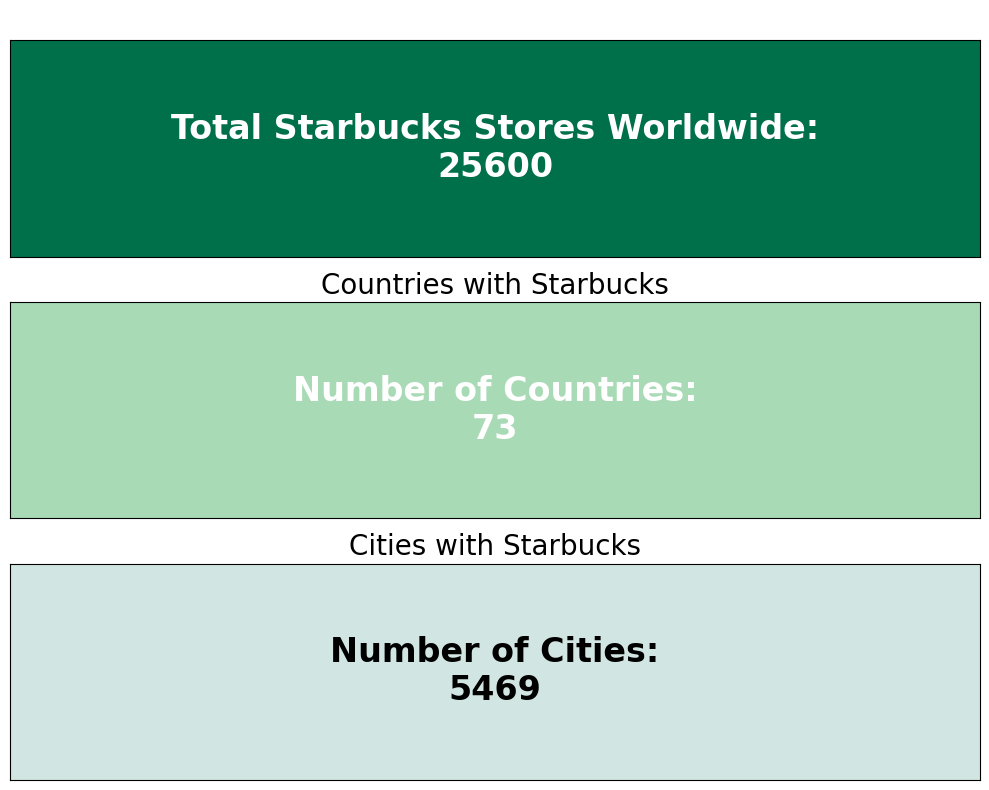

In [9]:
import matplotlib.pyplot as plt

# Data
total_stores = starbucks.shape[0]  # Total number of stores
num_countries = starbucks['Country'].nunique()  # Number of unique countries
num_cities = starbucks['City'].nunique()  # Number of unique cities

# Create figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# Starbucks Colors
dark_green = '#00704A'  # Starbucks dark green
light_green = '#A8DAB5'  # Lighter green for a softer background
light_blue = '#D1E6E2'   # Light blue background for contrast
gold = '#F5E05E'         # Soft gold color for contrast

# Total Stores
axs[0].text(0.5, 0.5, f"Total Starbucks Stores Worldwide:\n{total_stores}",
            ha='center', va='center', fontsize=24, weight='bold', color='white')
axs[0].set_facecolor(dark_green)  # Starbucks dark green
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_title('Total Stores', fontsize=20, color='white')

# Number of Countries
axs[1].text(0.5, 0.5, f"Number of Countries:\n{num_countries}",
            ha='center', va='center', fontsize=24, weight='bold', color='white')
axs[1].set_facecolor(light_green)  # Lighter green background
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_title('Countries with Starbucks', fontsize=20, color='black')

# Number of Cities
axs[2].text(0.5, 0.5, f"Number of Cities:\n{num_cities}",
            ha='center', va='center', fontsize=24, weight='bold', color='black')
axs[2].set_facecolor(light_blue)  # Light blue background
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_title('Cities with Starbucks', fontsize=20, color='black')

# Adjust layout
plt.tight_layout()
plt.show()



In [10]:
import pandas as pd
import plotly.express as px

# Assuming starbucks is a pandas DataFrame containing the Starbucks dataset

# Create a dictionary to map state abbreviations to full state names
state_name_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Filter for US stores
us_starbucks = starbucks[starbucks['Country'] == 'US']

# Grouping by State/Province and calculating Total
by_state = us_starbucks.groupby('State/Province').size().reset_index(name='Total')

# Map state abbreviations to full state names
by_state['Full State Name'] = by_state['State/Province'].map(state_name_mapping)

# Sorting the DataFrame and selecting the top 10 states
by_state = by_state.sort_values(by='Total', ascending=False).head(10)

# Bar chart visualization for top 10 states in the US with full state names
fig = px.bar(by_state,
             x='Total',
             y='Full State Name',
             title='Top 10 States in the US with Most Starbucks Stores',
             color='Total',
             color_continuous_scale=['#00704A', '#B3E2D8', '#E4F1ED'])

# Set white background
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

# Show the plot
fig.show()



In [11]:


# Grouping by Country and calculating Total and Percentage
by_country = starbucks.groupby('Country').size().reset_index(name='Total')
by_country['Percentage'] = round((by_country['Total'] / len(starbucks)) * 100, 2)

# Sorting and getting the top 10 countries
by_country = by_country.sort_values(by='Total', ascending=False).head(10)

# Function to get country name from country code using pycountry
def get_country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except AttributeError:
        return None  # In case the country code does not exist

# Map the country codes to country names
by_country['CountryName'] = by_country['Country'].apply(get_country_name)


print(by_country)

# treemap visualization
fig = px.treemap(by_country,
                 path=['Country'],
                 values='Total',
                 color='Total',
                 color_continuous_scale=[ '#00704A', '#B3E2D8', '#E4F1ED'],
                 title='Top 10 Countries with Most Starbucks Stores')

# Adding credits to the figure
fig.add_annotation(text="Sources: Starbucks Store Locator data (Github:chrismeller)",
                   font=dict(size=10),
                   showarrow=False,
                   xref="paper", yref="paper", x=1, y=-0.2)

# Showing the plot
fig.show()



   Country  Total  Percentage                CountryName
70      US  13608       53.16              United States
17      CN   2734       10.68                      China
14      CA   1468        5.73                     Canada
37      JP   1237        4.83                      Japan
39      KR    993        3.88         Korea, Republic of
29      GB    901        3.52             United Kingdom
46      MX    579        2.26                     Mexico
69      TW    394        1.54  Taiwan, Province of China
67      TR    326        1.27                    Türkiye
54      PH    298        1.16                Philippines


In [12]:
import pandas as pd
import plotly.express as px
import pycountry

# Assuming starbucks is a pandas DataFrame containing the Starbucks dataset
# Grouping by City and calculating Total and Percentage
by_city = starbucks.groupby('City').size().reset_index(name='Total')
by_city['Percentage'] = round((by_city['Total'] / len(starbucks)) * 100, 2)

# Sorting and getting the top 10 cities
by_city = by_city.sort_values(by='Total', ascending=False).head(10)

# Display the data table (can be done with Streamlit, Dash, or Jupyter)
print(by_city)

# Creating a treemap visualization using Plotly with Starbucks brand colors
fig = px.treemap(by_city,
                 path=['City'],
                 values='Total',
                 color='Total',
                 color_continuous_scale=['#00704A', '#B3E2D8', '#E4F1ED'],
                 title='Top 10 Cities with Most Starbucks Stores')

# Adding credits to the figure
fig.add_annotation(text="Sources: Starbucks Store Locator data (Github:chrismeller)",
                   font=dict(size=10),
                   showarrow=False,
                   xref="paper", yref="paper", x=1, y=-0.2)

# Showing the plot
fig.show()


             City  Total  Percentage
5298          上海市    542        2.12
4176        Seoul    243        0.95
5319          北京市    234        0.91
3219     New York    232        0.91
2626       London    216        0.84
4695      Toronto    192        0.75
2902  Mexico City    180        0.70
811       Chicago    180        0.70
4143      Seattle    156        0.61
2510    Las Vegas    156        0.61







.

In [13]:
# Grouping by Ownership Type and calculating Total
by_ownership = starbucks.groupby('Ownership Type').size().reset_index(name='Total')

# Pie chart visualization
fig = px.pie(by_ownership,
             names='Ownership Type',
             values='Total',
             title='Starbucks Stores by Ownership Type',
             color_discrete_sequence=['#00704A', '#B3E2D8', '#E4F1ED'])

# Set white background
fig.update_layout(paper_bgcolor='white')

# Show the plot
fig.show()


## Observations:
- Nearly 47% of stores are company-owned, with only about 2% being franchises.
- Approximately 15% of stores operate under joint ventures, especially in countries with restrictions on foreign direct investment (FDI).



.

In [14]:
# Grouping by City
by_city = starbucks.groupby('City').size().reset_index(name='Total')
by_city = by_city.sort_values(by='Total', ascending=False).head(10)

# Bar chart visualization for top 10 cities
fig = px.bar(by_city,
             x='City',
             y='Total',
             title='Top 10 Cities with Most Starbucks Stores',
             color='Total',
             color_continuous_scale=['#00704A', '#B3E2D8', '#E4F1ED'])

# Set white background
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white')

# Show the plot
fig.show()


## Observations:
- Notably, non-U.S. cities such as Shanghai have the highest number of stores.
- The top city, Shanghai, has more than double the number of stores compared to New York City.





.

In [15]:
import pandas as pd
import plotly.express as px
import pycountry

# Assuming starbucks is a pandas DataFrame containing the Starbucks dataset

# Filter for Joint Venture ownership type
joint = starbucks[starbucks['Ownership Type'] == "Joint Venture"].groupby('Country').size().reset_index(name='Total')

# Create a mapping for country names using pycountry
joint['CountryName'] = joint['Country'].apply(lambda x: pycountry.countries.get(alpha_2=x).name if pd.notnull(x) else x)

# Sort the DataFrame in descending order by Total
joint = joint.sort_values(by='Total', ascending=False)

# Display the joint DataFrame
print(joint)

# Starbucks brand colors
starbucks_colors = ['#00704A', '#B3E2D8', '#E4F1ED']  # Adjust these colors as per your preference

# Bar chart visualization for Joint Venture countries
fig = px.bar(joint,
             x='CountryName',  # Use the full country name for display
             y='Total',
             title='Countries Having Starbucks Stores by Joint Venture',
             color='Total',
             color_continuous_scale=starbucks_colors)  # Use Starbucks brand colors

# Add layout settings
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    title_font=dict(size=20),
    xaxis_title='Country',
    yaxis_title='Total Stores',
    xaxis_tickangle=-45  # Rotate x-axis labels for better readability
)

# Show the plot
fig.show()


   Country  Total                CountryName
1       CN   1220                      China
5       JP   1070                      Japan
6       KR    993         Korea, Republic of
10      TW    394  Taiwan, Province of China
9       RU    107         Russian Federation
4       IN     88                      India
8       PL     53                     Poland
2       CZ     28                    Czechia
3       HU     16                    Hungary
7       MY      6                   Malaysia
0       AR      1                  Argentina


- Starbucks has entered into joint ventures in various countries, particularly in major Asian economies.
- Example: In India, all Starbucks outlets are a joint venture with Tata Group, operating as Tata Starbucks Private Limited. This partnership has been essential in establishing Starbucks in a market with FDI restrictions.

## **Conclusion**

Starbucks has significantly shaped the global coffee culture since its founding in 1971. With a strong presence in the U.S. and strategic expansion into international markets, Starbucks continues to be a leader in the coffee industry. Its unique ownership structure and innovative partnerships, particularly in Asia, underscore its adaptability and commitment to growth.